# Karar Ağaçları (Decision Trees)

Karar ağaçları, sınıflandırma ve regresyon problemlerinde yaygın olarak kullanılan, görsel olarak anlaşılır bir makine öğrenimi algoritmasıdır. Veri, çeşitli karar düğümleri üzerinden dallara ayrılır ve her dal bir özelliğe (feature) göre bölünür. En sonunda yaprak düğümlerde sınıflar yer alır.

- İstatistikte makine öğrenmesi başlığı altında birçok karar ağacı algoritması geliştirilmiştir.  
- Karar ağaçları akış şemalarına benzeyen yapılardır.  
- Her bir nitelik bir düğüm tarafından temsil edilir.  
- Dallar ve yapraklar ağaç yapısını oluşturan elemanlardır.  
- En son yapı **yaprak**, en üst yapı **kök** ve bunların arasında kalan yapılar ise **dal** olarak isimlendirilir (Quinlan).


## Entropi (Entropy)
Entropi, bir veri kümesindeki bilgi düzensizliğini ölçen bir metriktir. Ne kadar çok karışıklık (yani sınıf çeşitliliği) varsa, entropi o kadar yüksektir. Karar ağacı oluşturulurken amaç, dallanma işlemi ile entropiyi mümkün olduğunca azaltmaktır.

### Entropi Formülü

![formül](images/entropi_formul.png)

- 𝑆: veri kümesi,
- 𝑝𝑖: sınıf i'nin örnek içindeki oranı (olasılığı).


## Information Gain (Bilgi Kazancı)

Information Gain (IG), bir özellik (feature)'in hedef değişkenin (class) belirsizliğini ne kadar azalttığını ölçen bir metriktir. Özellikle karar ağaçlarında (Decision Trees) kullanılır ve veri kümesindeki en iyi bölmeyi (split) belirlemek için kullanılır.

- Bilgi kazancı ne kadar yüksekse, o özelliğin sınıflandırmaya katkısı o kadar fazladır.
- Bilgi kazancı sıfıra yakınsa, o özellik hedef değişken hakkında fazla bilgi taşımaz.
- Karar ağaçları Karar ağaçları maksimum yapan özelliği seçerek ağacı dallandırır

Tüm Özelliklerin Bilgi Kazançları:
                      Feature  Information Gain
          study_hours_per_day          0.273505
                  sleep_hours          0.030973
extracurricular_participation          0.022926
         mental_health_rating          0.021459
           exercise_frequency          0.013037
                       gender          0.009588
                netflix_hours          0.009147
           social_media_hours          0.003938
     parental_education_level          0.001930
                part_time_job          0.000814
        attendance_percentage          0.000611
                          age          0.000000
                 diet_quality          0.000000
             internet_quality          0.000000


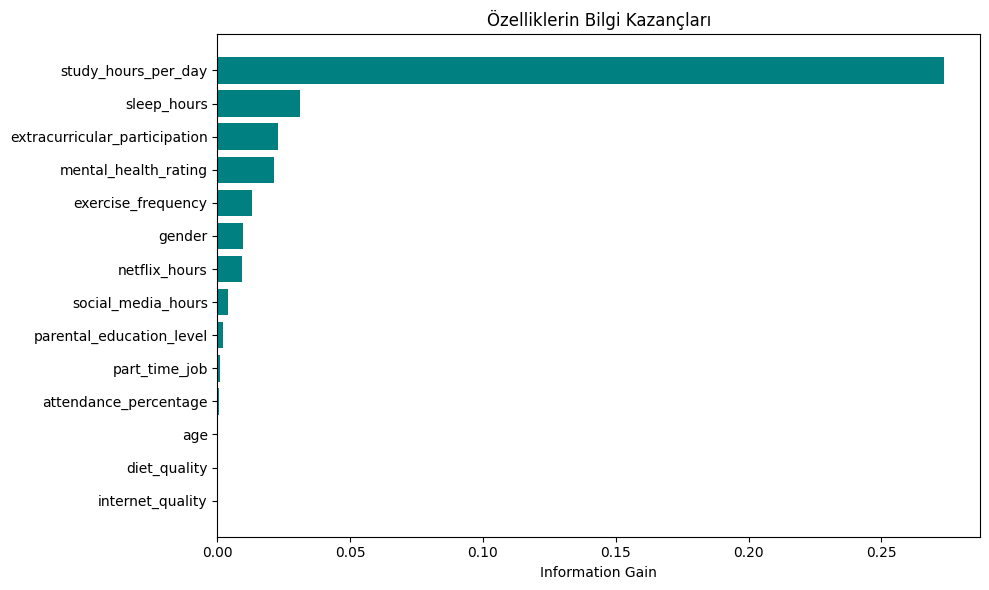

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv("data.csv")

# Hedef değişkeni oluştur (60 ve üzeri geçer)
df['result'] = df['exam_score'].apply(lambda x: 'Geçti' if x >= 60 else 'Kaldı')

# Giriş ve hedef değişkenleri ayır
X = df.drop(columns=['exam_score', 'grade', 'student_id', 'result'], errors='ignore')
y = df['result']

# Kategorik değişkenleri sayısallaştır
X_encoded = X.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Bilgi kazancı hesapla
info_gain = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

# Bilgi kazançlarını DataFrame olarak düzenle
info_gain_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Information Gain': info_gain
}).sort_values(by='Information Gain', ascending=False)

# Tüm bilgi kazançlarını yazdır
print("Tüm Özelliklerin Bilgi Kazançları:")
print(info_gain_df.to_string(index=False))

# Grafikle göster
plt.figure(figsize=(10, 6))
plt.barh(info_gain_df['Feature'], info_gain_df['Information Gain'], color='teal')
plt.xlabel("Information Gain")
plt.title("Özelliklerin Bilgi Kazançları")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import graphviz
from IPython.display import display

# Veriyi oku
df = pd.read_csv("data.csv")

# Hedef değişkeni oluştur
df['result'] = df['exam_score'].apply(lambda x: 'Geçti' if x >= 60 else 'Kaldı')

# Kullanılacak özellikler
selected_columns = ['study_hours_per_day', 'sleep_hours', 'mental_health_rating']
X = df[selected_columns]
y = df['result']

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modeli (entropi tabanlı)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Performans
y_pred = clf.predict(X_test)
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Graphviz için export
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    label='all'
)

# Renk değiştirme (isteğe bağlı)
dot_data = dot_data.replace('class = Geçti', 'class = Geçti ✔️')
dot_data = dot_data.replace('class = Kaldı', 'class = Kaldı ❌')

# Karar ağacını çiz
graph = graphviz.Source(dot_data)
display(graph)




Doğruluk Oranı: 0.91
              precision    recall  f1-score   support

       Geçti       0.93      0.95      0.94       149
       Kaldı       0.85      0.78      0.82        51

    accuracy                           0.91       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.91      0.91      0.91       200



TypeError: Source.__init__() got an unexpected keyword argument 'graph_attr'